# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


# 1.-

In [3]:
filas_nan = df[df.isnull().any(axis=1)] #dataframe donde alguna de las calumnas de los datos eran nan
filas_nan

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
23584,1986,1.3,NaN,493.722222,Coches pequeños,dos,Manual,Normal,muy pequeño,moderado,moderado,0.210301
32352,1985,NaN,NaN,370.291667,Coches pequeños,cuatro,Manual,Normal,NaN,muy bajo,muy bajo,0.157725
32353,1985,NaN,NaN,386.391304,Coches pequeños,cuatro,Manual,Normal,NaN,bajo,bajo,0.164583


In [4]:
df1=df.drop(["clase_tipo","traccion_tipo","transmision_tipo","combustible_tipo","tamano_motor_tipo","consumo_tipo","co2_tipo"],axis=1)
df1.head() #eliminamos columnas no numericas

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [5]:
filas_nan = df1[df1.isnull().any(axis=1)] #dataframe donde alguna de las calumnas de los datos eran nan
filas_nan

,year,desplazamiento,cilindros,co2,consumo_litros_milla
23584,1986,1.3,NaN,493.722222,0.210301
32352,1985,NaN,NaN,370.291667,0.157725
32353,1985,NaN,NaN,386.391304,0.164583


In [6]:
df1.isna().sum() #canidad de elementos nan en nuestro dataframe por columna

year                    0
desplazamiento          2
cilindros               3
co2                     0
consumo_litros_milla    0
dtype: int64

In [7]:
df1=df1.fillna(df1.mean()) #rellenamos datos nan con el promedio de su columna
df1.isna().sum() #canidad de elementos nan en nuestro dataframe por columna

year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64

In [8]:
df2=pd.DataFrame(MinMaxScaler().fit_transform(df1)) #reescalar el datatframe
df2.columns=df1.columns #cconservar nombres de columnas

In [9]:
df2

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


ahora veremos como hacer el proceso anterior en menos lineas de codigo.

In [10]:
df1=df.drop(["clase_tipo","traccion_tipo","transmision_tipo","combustible_tipo","tamano_motor_tipo","consumo_tipo","co2_tipo"],axis=1).fillna(df.mean())
df2=pd.DataFrame(MinMaxScaler().fit_transform(df1))
df2.columns=df1.columns
df2.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


# 2.-

In [11]:
df3=df.drop(["year","desplazamiento","cilindros","co2","consumo_litros_milla"],axis=1)
df3.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [12]:
df4=pd.get_dummies(df3)
df4.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


esa funcion separa cada clase en sub clases relacionadas con los valores posibles de cada clase, despues de eso asigna un valor uno en la subclase donde el valor era la relacionada con la clase y 0 en otro caso.

# 3.-

In [13]:
df_procesado=pd.concat([df2,df4],axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

# 1.-

In [14]:
kmeans = KMeans(n_clusters=8).fit(df_procesado)

# 2.-

In [15]:
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))
centroids_df.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.579550,0.269830,0.210005,0.305067,0.226473,0.025947,0.094316,0.072488,0.192545,0.397446,...,6.177924e-04,9.619028e-01,8.237232e-04,-1.665335e-16,3.665568e-02,9.714451e-16,9.684926e-01,2.944811e-02,6.661338e-16,2.059308e-03
1,0.427318,0.223790,0.173637,0.304599,0.226412,0.126441,0.097434,0.004835,0.088137,0.517665,...,-2.775558e-17,9.776869e-01,-8.326673e-16,4.996004e-16,2.231313e-02,2.775558e-16,9.921904e-01,7.809595e-03,5.551115e-17,8.326673e-16
2,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,5.764163e-02,1.304512e-15,5.599473e-03,9.367589e-01,-1.443290e-15,7.771561e-16,6.106227e-16,-7.216450e-16,1.000000e+00,1.276756e-15
3,0.408972,0.331546,0.256886,0.354296,0.282120,0.180711,0.083772,0.090520,0.133147,0.184167,...,-8.604228e-16,1.382488e-02,9.807439e-01,-1.110223e-15,5.431205e-03,1.152074e-03,7.216450e-16,9.988479e-01,6.383782e-16,1.970646e-15
4,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,3.115871e-02,2.248202e-15,1.168452e-02,9.571568e-01,-2.331468e-15,1.703992e-03,7.216450e-16,4.868549e-04,9.978092e-01,1.609823e-15


In [16]:
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

# 3.-

In [17]:
for i in range(0,8):
    print("Media de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mean())
    print("----------------------------------------------------- \n")
    print("Moda de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mode())
    print("_____________________________________________________ \n")

Media de variables numéricas del cluster 1
year              0.579550
desplazamiento    0.269830
cilindros         0.210005
co2               0.305067
dtype: float64
----------------------------------------------------- 

Moda de variables numéricas del cluster 1
       year  desplazamiento  cilindros       co2
0  0.970588        0.179487   0.142857  0.317749
_____________________________________________________ 

Media de variables numéricas del cluster 2
year              0.427318
desplazamiento    0.223790
cilindros         0.173637
co2               0.304599
dtype: float64
----------------------------------------------------- 

Moda de variables numéricas del cluster 2
   year  desplazamiento  cilindros       co2
0   0.0        0.179487   0.142857  0.317749
_____________________________________________________ 

Media de variables numéricas del cluster 3
year              0.452443
desplazamiento    0.562730
cilindros         0.405562
co2               0.501887
dtype: float64
------

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [18]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,121305.596303
1,10,83263.235419
2,20,67034.968158
3,30,56708.552827
4,50,45660.252132
5,75,36914.365394
6,100,31037.845822
7,200,17929.251503
8,300,11400.939800


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

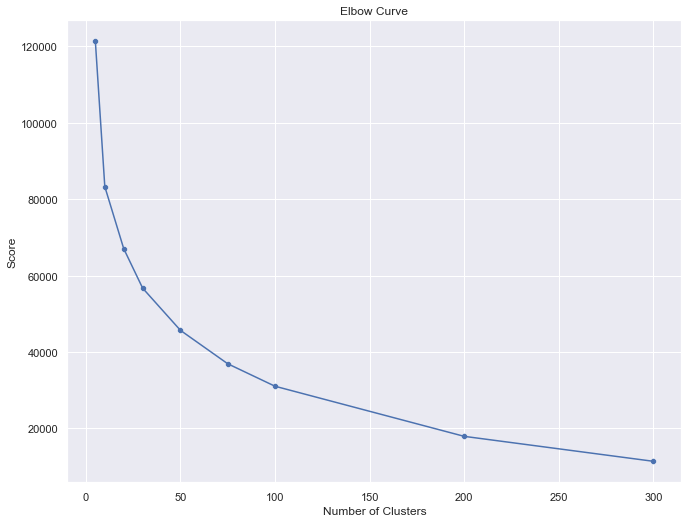

In [19]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

a partir de 100 clusters comienza a estabilizarse pero a los 200 y 300 es una mejor estimacion, depende de gasto computacional deseado  

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [21]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [22]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
print('Media')
iris.mean(axis=0)

Media


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
species         1.000000
dtype: float64

In [24]:
print('Varianza')
iris.var(axis=0)

Varianza


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)
modelo_pca = pca_pipe.named_steps['pca']

In [27]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


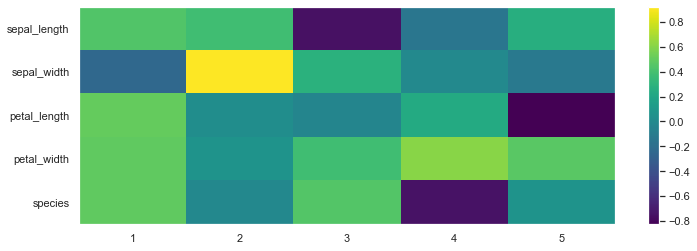

In [28]:
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

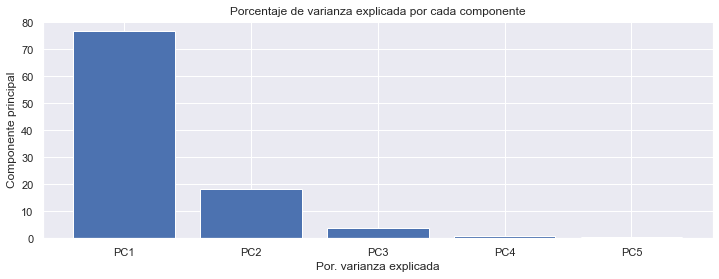

In [29]:
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

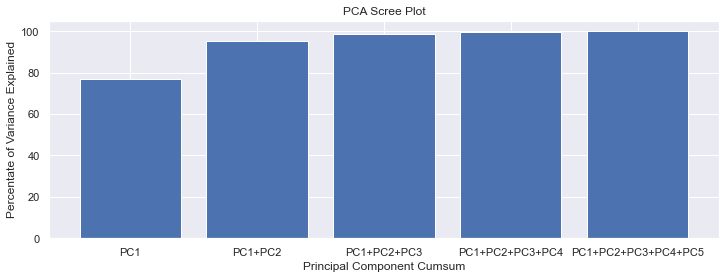

In [30]:
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [31]:
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(iris.drop(columns='species'))
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = iris['species']

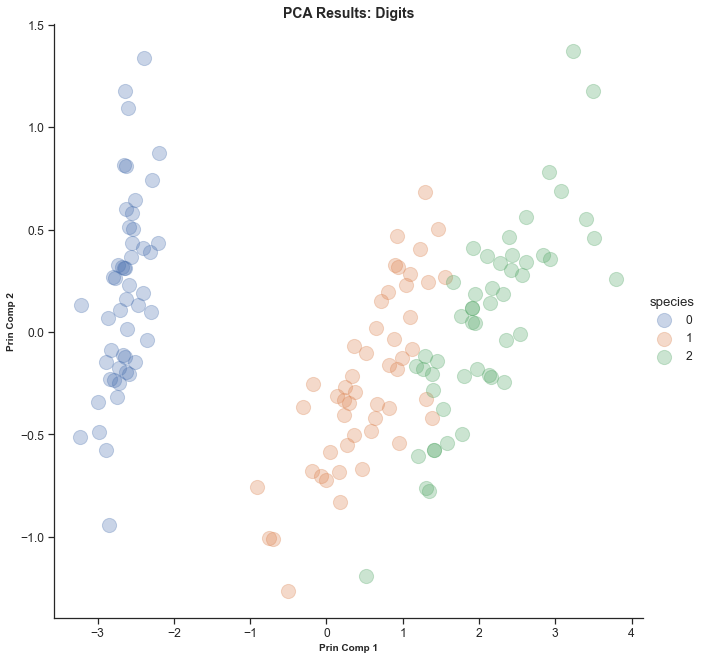

In [32]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [33]:
 embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(iris.drop(columns='species'))
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = iris['species']

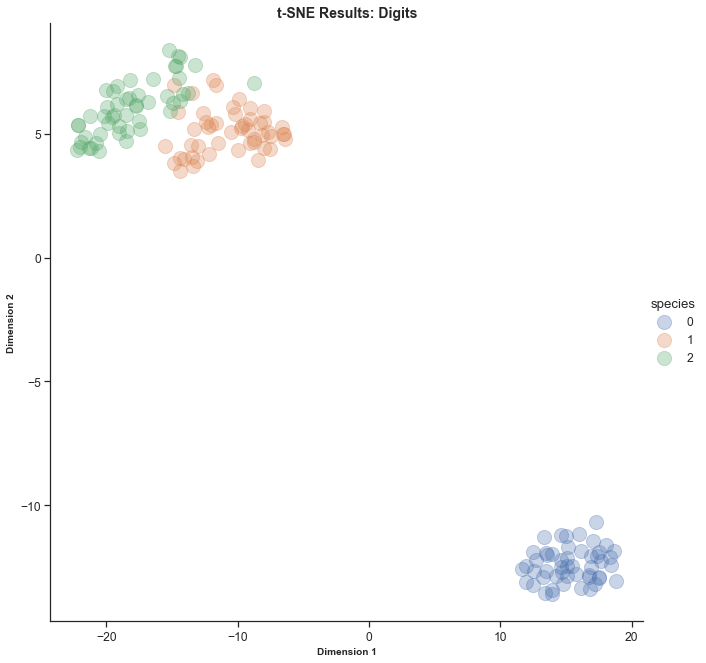

In [34]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

notamos al comparar los graficcos que en ambos casos la especie 0 esta muy separada de las otras dos, pero las dos ultimas se enccuentran cerca en los dos graficos, considero que el t-SNE es mejor porque los datos  estan mas juntos por clase por lo que tendrian mayor "densidad" y seria mas facil clasificar